In [1]:
import pandas as pd

In [2]:
project_data = pd.read_csv('data.csv')

In [92]:
x = project_data["Close_ETF"]

In [4]:
x.describe()

count    1000.000000
mean      121.152960
std        12.569790
min        96.419998
25%       112.580002
50%       120.150002
75%       128.687497
max       152.619995
Name: Close_ETF, dtype: float64

In [5]:
x.mean()

121.1529600120001

In [6]:
x.std()

12.569790313110744

### 50 groups of 20

In [38]:
project_data['n20bins']=pd.qcut(project_data['Close_ETF'], q=50)
project_data.head()

,Close_ETF,oil,gold,JPM,n20bins
0,97.349998,0.039242,0.004668,0.032258,"(96.419, 98.799]"
1,97.750000,0.001953,-0.001366,-0.002948,"(96.419, 98.799]"
2,99.160004,-0.031514,-0.007937,0.025724,"(98.799, 99.856]"
3,99.650002,0.034552,0.014621,0.011819,"(98.799, 99.856]"
4,99.260002,0.013619,-0.011419,0.000855,"(98.799, 99.856]"


In [42]:
y = project_data.groupby('n20bins').mean()['Close_ETF']
y

n20bins
(96.419, 98.799]       98.050000
(98.799, 99.856]       99.367501
(99.856, 100.769]     100.287500
(100.769, 103.322]    101.928001
(103.322, 104.597]    103.781500
(104.597, 105.972]    105.211500
(105.972, 107.884]    106.854500
(107.884, 109.645]    108.826001
(109.645, 110.208]    109.869999
(110.208, 111.068]    110.654999
(111.068, 111.548]    111.280000
(111.548, 112.354]    111.890500
(112.354, 112.86]     112.628096
(112.86, 113.2]       113.030500
(113.2, 113.777]      113.451053
(113.777, 114.244]    113.944500
(114.244, 114.783]    114.498500
(114.783, 115.65]     115.122381
(115.65, 116.6]       116.137500
(116.6, 117.43]       117.152500
(117.43, 118.096]     117.767368
(118.096, 118.6]      118.329048
(118.6, 119.205]      118.914738
(119.205, 119.516]    119.355001
(119.516, 120.15]     119.902857
(120.15, 120.68]      120.412500
(120.68, 121.194]     120.957368
(121.194, 121.716]    121.414500
(121.716, 122.515]    122.244000
(122.515, 123.334]    122.912000
(1

<AxesSubplot:ylabel='Frequency'>

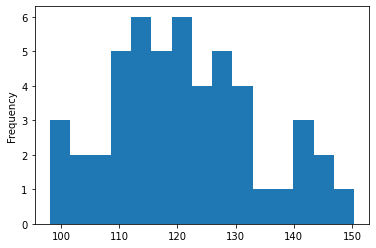

In [50]:
y.plot.hist(bins=15)

### from visual inspection not very normal

In [51]:
y.mean()

121.16164592586216

In [52]:
y.std()

12.686566498035301

In [57]:
x.mean()

121.1529600120001

In [58]:
x.std()

12.569790313110744

### 10 groups of 100

In [59]:
project_data['n100bins'] = pd.qcut(project_data['Close_ETF'], q=10)
project_data.head()

,Close_ETF,oil,gold,JPM,n20bins,n100bins
0,97.349998,0.039242,0.004668,0.032258,"(96.419, 98.799]","(96.419, 104.597]"
1,97.750000,0.001953,-0.001366,-0.002948,"(96.419, 98.799]","(96.419, 104.597]"
2,99.160004,-0.031514,-0.007937,0.025724,"(98.799, 99.856]","(96.419, 104.597]"
3,99.650002,0.034552,0.014621,0.011819,"(98.799, 99.856]","(96.419, 104.597]"
4,99.260002,0.013619,-0.011419,0.000855,"(98.799, 99.856]","(96.419, 104.597]"


In [60]:
z=project_data.groupby('n100bins').mean()['Close_ETF']

<AxesSubplot:ylabel='Frequency'>

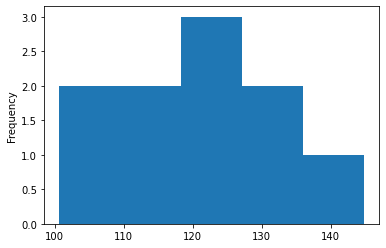

In [160]:
z.plot.hist(bins=5)

### bit more normal but not by much

In [64]:
z.mean()

121.15918584274345

In [65]:
x.mean()

121.1529600120001

In [66]:
z.std()

13.080360155986197

In [67]:
x.std()

12.569790313110744

### 50 random samples (with replacement) groups of 20

In [127]:
randsamp20 = []
for i in range(50):
    randsamp20.append(pd.Series(project_data['Close_ETF'].sample(n=20, replace=True)))

In [134]:
randsamp20means = []
for i in range(50):
    randsamp20means.append(randsamp20[i].mean())

<AxesSubplot:ylabel='Frequency'>

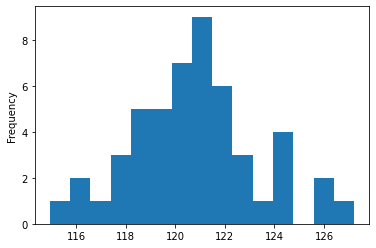

In [141]:
a = pd.Series(randsamp20means, dtype=float)
a.plot.hist(bins=15)

### Much more normal looking 

In [142]:
a.mean()

120.75898000600002

In [144]:
a.std()

2.5719267464122653

### 10 groups of 100

In [145]:
randsamp100 = []
for i in range(10):
    randsamp100.append(pd.Series(project_data['Close_ETF'].sample(n=100, replace=True)))

In [150]:
randsamp100means = []
for i in range(10):
    randsamp100means.append(randsamp100[i].mean())

<AxesSubplot:ylabel='Frequency'>

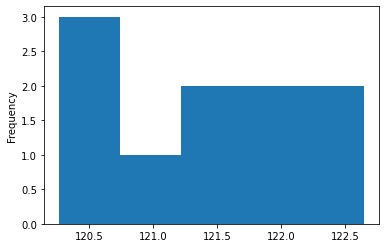

In [156]:
b = pd.Series(randsamp100means, dtype=float)
b.plot.hist(bins=5)

### too few bins to judge normality

In [157]:
b.mean()

121.337590058

In [158]:
b.std()

0.8072484456404834